In [1]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
from lmfit.models import PowerLawModel, ExponentialModel, GaussianModel
from lib.to_precision import to_precision
import lmfit
from sympy import *
import sympy
from sympy.solvers import solve
from sympy import Symbol
import math
import datetime
from ipywidgets import interact, FloatText, IntText, fixed, Text
now = lambda: str(datetime.datetime.now()).replace("-", "").replace(":", "").replace(" ", "_").split(".")[0]
import inspect

from lmfit.models import Model
import numpy as np
import pylandau

In [2]:
class Data:
    __x = []
    __y = []
    __xerr = 0
    __yerr = 0
    __XName = "x"
    __YName = "y"
    __FileName = "dataset_1",
    __Version = ""
    __pars = None
    __func = None
    
    def set_func(self, x):
        self.__func = x
        return
    def get_func(self):
        return self.__func

    def set_x(self, x):
        self.__x = x
        return  
    def set_y(self, x):
        self.__y = x
        return  
    def set_yerr(self, x):
        self.__yerr = x
        return  
    def set_xerr(self, x):
        self.__xerr = x
        return  
    
    def get_x(self):
        return self.__x
    def get_y(self):
        return self.__y
    def get_xerr(self):
        return self.__xerr
    def get_yerr(self):
        return self.__yerr
    
    def set_XName(self, x):
        self.__XName = rf"{x}"
        return
    def set_YName(self, x):
        self.__YName = rf"{x}"
        return
    def get_XName(self):
        return self.__XName
    def get_YName(self):
        return self.__YName
    
    def get_FileName(self):
        return self.__FileName
    
    def set_FileName(self, x):
        self.__FileName = f"{x}"
        return
    def set_Version(self, x):
        self.__Version = f"{x}"
        return
    def get_Version(self):
        return self.__Version
    
    def get_pars(self):
        return self.__pars
    def set_pars(self,x):
        self.__pars = x
        return
    
def finish(x,y,result, string, y_err, yLabel, xLabel, var_func_bool= False):
    fig = plt.figure(figsize=(9,6), dpi=80)
    dynamic_resolution_array = np.arange(min(x),max(x), 0.001*abs(max(x)-min(x)))
    #plt.plot(x, y, 'skyblue')
    plt.plot(dynamic_resolution_array, result.eval(x = dynamic_resolution_array), 'r-', label = r'Fit: reduced $\chi^2$ =  '+str(to_precision(result.result.redchi,3)))
    plt.errorbar(
        y = y, 
        x = x, 
        yerr = y_err,
        fmt = 'o', markersize = 3.5, alpha = 1, mfc = 'black', c = 'skyblue', zorder = 0, label = r'Werte'
        ) #xerr = x_err, yerr = y_err, 
    plt.legend(loc='best')

    plt.ylabel(yLabel, fontsize=20)
    plt.xlabel(xLabel, fontsize=20)

    plt.legend(fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    string += Daten.get_Version()
    fig.savefig(string + "_Fit.pdf")
    plt.show()

    string_fig = "\\begin{figure}[ht] \n \t\\centering \n \t\\includegraphics[width= 0.65 \\textwidth]{Fits/" + string + "_Fit.pdf} \n" \
        + "\t\\caption{"+str(string)+", Fit} \n \t\\label{fig:"+str(string)+", Fit} \n\end{figure}"
    print(string_fig)

    text_file = open(string+"_params"+".tex", "w+", encoding="utf-8")
    string_fig += "\n \\\\ \n" 
    # string_fig += get_Latex_Func(Daten.get_func()) if var_func_bool else ""
    string_fig += table_of_params(result)
    text_file.write(string_fig)
    text_file.close()
    
def table_of_params(result_of_fit):
    sig_num = 3
    string = "" + (
        "\\begin{table}[ht] \n"
        "\centering \n") +"\caption{" + str(Daten.get_FileName()) +", Fit Parameter Tabelle} \n"  + (
        "\label{tab:my-table}\n"
        "\\begin{tabular}{|l|c|}\n" 
        "\hline\n"
        "Parameter Name\t&\tWert \\\\ \hline\n"
    )
    for i in result_of_fit.params:
        str_param_val = f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}" 
        # str_param_std = f"{float(result_of_fit.params[i].stderr): .{(len(str(math.floor(result_of_fit.params[i].stderr))) if math.floor(result_of_fit.params[i].stderr) != 0 else 0) +sig_num}}" 
        string += (
            str(i) + "\t&\t" +
            str_param_val +
            ("" if "." in str_param_val  else ".")+
            ("0"*((len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num+2 -len(f"{float(result_of_fit.params[i].value): .{(len(str(math.floor(result_of_fit.params[i].value))) if math.floor(result_of_fit.params[i].value) != 0 else 0) +sig_num}}"))) +
            "\\\\ \hline\n"
        )
    string += (
        "\end{tabular} \n"
        "\end{table}"
    )
    return string

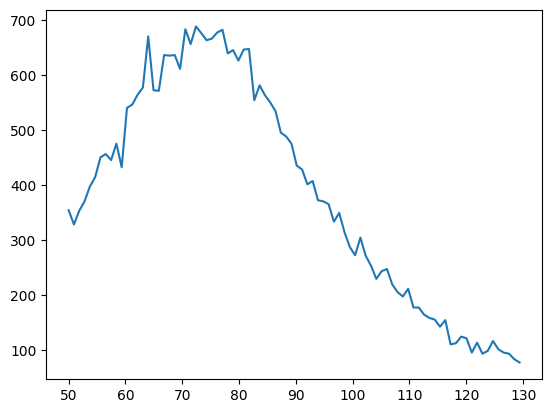

In [3]:
Datei_Name = "A4_V20.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 50) & (x < 130)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


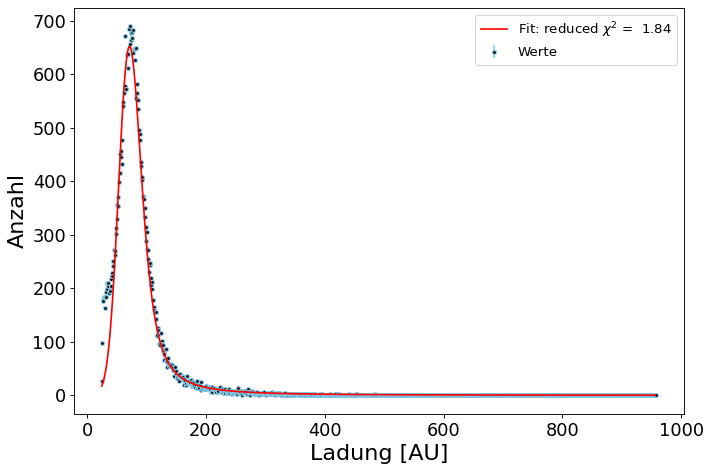

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V20.h5_charge.txt_Fit.pdf} 
	\caption{A4_V20.h5_charge.txt, Fit} 
 	\label{fig:A4_V20.h5_charge.txt, Fit} 
\end{figure}
1.838101442842208


name,value,initial value,min,max,vary
mpv,89.6955731,None,50.0200560,129.371090,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,23.1745939,None,0.10000000,129.371090,True
A,689.000000,None,1.00000000,1378.00000,True


In [4]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars

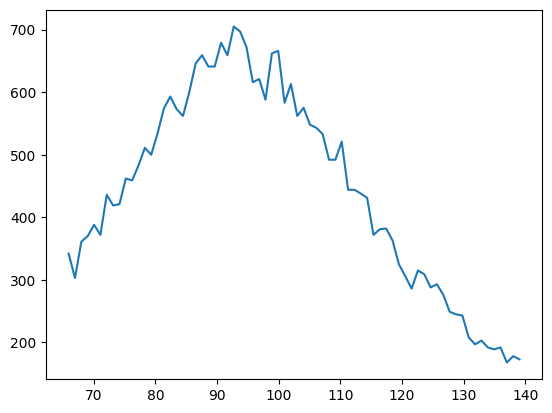

In [5]:
Datei_Name = "A4_V30.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 65) & (x < 140)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


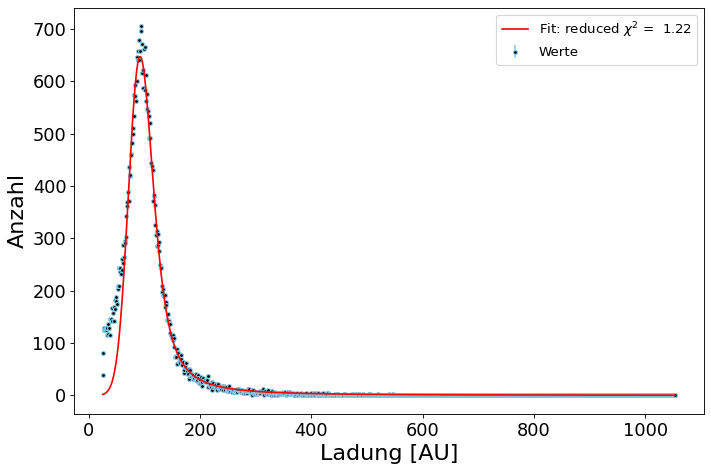

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V30.h5_charge.txt_Fit.pdf} 
	\caption{A4_V30.h5_charge.txt, Fit} 
 	\label{fig:A4_V30.h5_charge.txt, Fit} 
\end{figure}
1.2246604035912965


name,value,initial value,min,max,vary
mpv,102.500374,None,65.9150938,139.085653,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,21.4179554,None,0.10000000,139.085653,True
A,705.000000,None,1.00000000,1410.00000,True


In [6]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars

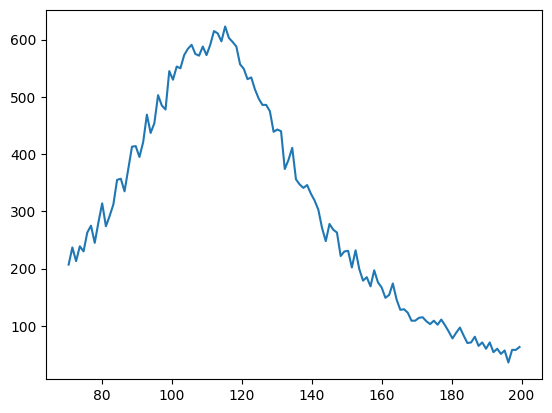

In [7]:
Datei_Name = "A4_V40.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 70) & (x < 200)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


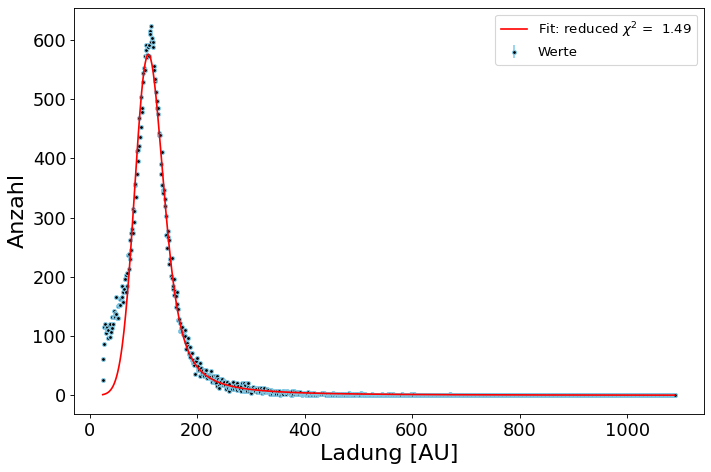

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V40.h5_charge.txt_Fit.pdf} 
	\caption{A4_V40.h5_charge.txt, Fit} 
 	\label{fig:A4_V40.h5_charge.txt, Fit} 
\end{figure}
1.4891423960788093


name,value,initial value,min,max,vary
mpv,134.931121,None,70.4300577,199.432184,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,37.5462110,None,0.10000000,199.432184,True
A,623.000000,None,1.00000000,1246.00000,True


In [8]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars

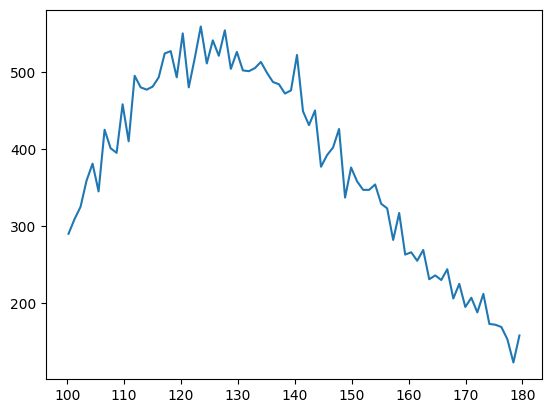

In [9]:
Datei_Name = "A4_V50.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 100) & (x < 180)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


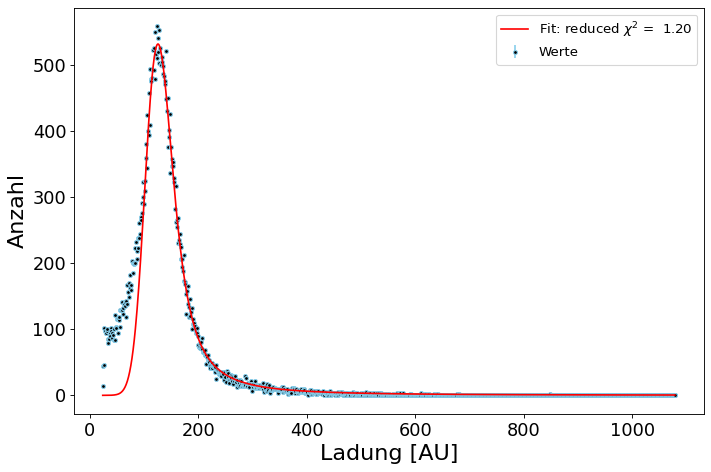

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V50.h5_charge.txt_Fit.pdf} 
	\caption{A4_V50.h5_charge.txt, Fit} 
 	\label{fig:A4_V50.h5_charge.txt, Fit} 
\end{figure}
1.199799327182311


name,value,initial value,min,max,vary
mpv,139.851643,None,100.229680,179.473605,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,23.1787540,None,0.10000000,179.473605,True
A,559.000000,None,1.00000000,1118.00000,True


In [10]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars

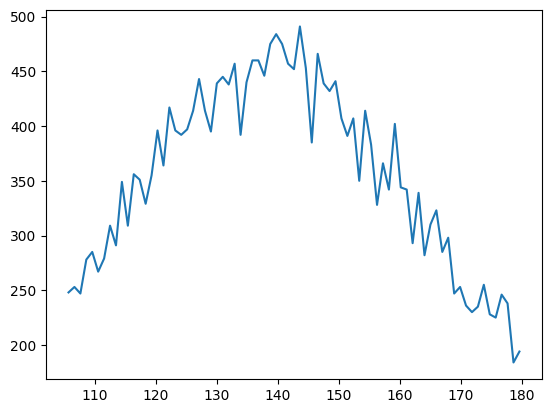

In [11]:
Datei_Name = "A4_V60.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 105) & (x < 180)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


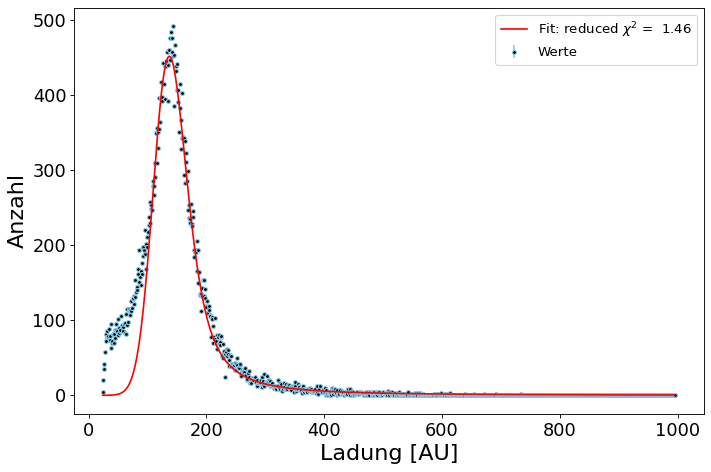

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V60.h5_charge.txt_Fit.pdf} 
	\caption{A4_V60.h5_charge.txt, Fit} 
 	\label{fig:A4_V60.h5_charge.txt, Fit} 
\end{figure}
1.4597930254745766


name,value,initial value,min,max,vary
mpv,142.654456,None,105.671936,179.636976,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,21.6309891,None,0.10000000,179.636976,True
A,491.000000,None,1.00000000,982.000000,True


In [12]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars

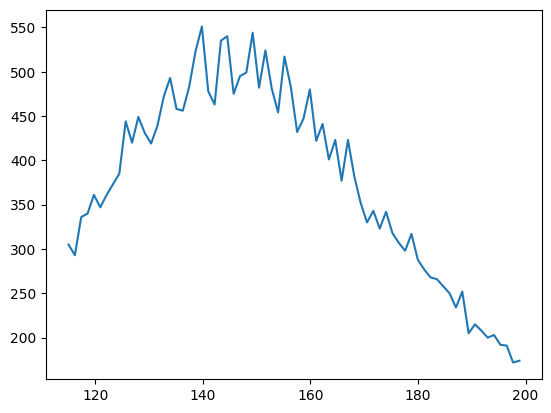

In [13]:
Datei_Name = "A4_V70.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 115) & (x < 200)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


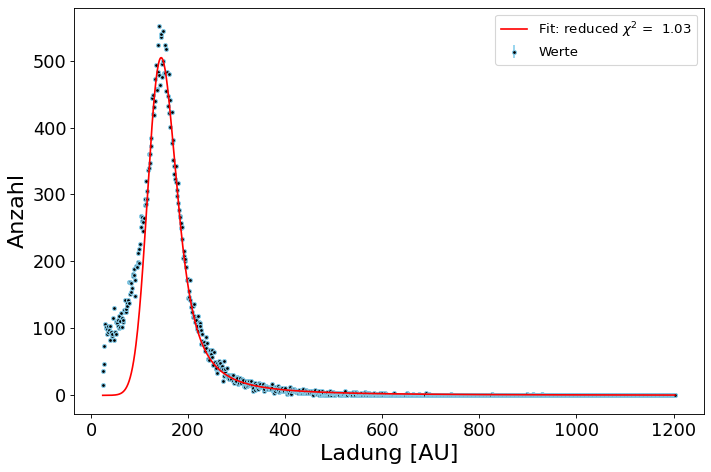

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V70.h5_charge.txt_Fit.pdf} 
	\caption{A4_V70.h5_charge.txt, Fit} 
 	\label{fig:A4_V70.h5_charge.txt, Fit} 
\end{figure}
1.0286532148099141


name,value,initial value,min,max,vary
mpv,156.945854,None,115.025944,198.865764,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,24.5409838,None,0.10000000,198.865764,True
A,551.000000,None,1.00000000,1102.00000,True


In [14]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars

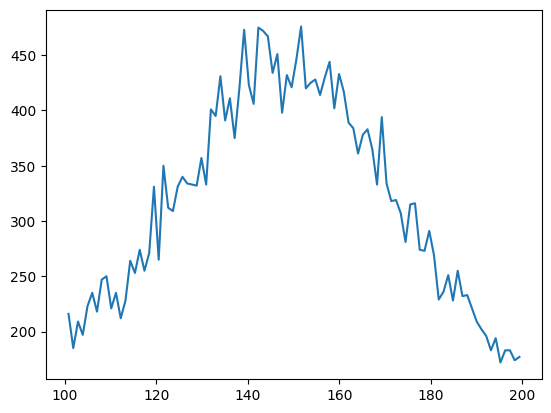

In [15]:
Datei_Name = "A4_V80.h5_charge.txt"

Daten = Data()
data = np.genfromtxt(Datei_Name, skip_header=0, skip_footer=0)
daten = np.histogram(data, bins=1000)
y = daten[0]

x = np.zeros(y.shape)
for i, x_wert in enumerate(daten[1]):
    if i == 0:
        continue
    x_pre_wert = daten[1][i-1]
    x[i-1] = (x_wert + x_pre_wert)/2
    
Daten.set_XName(r"Ladung [AU]")
Daten.set_YName(r"Anzahl")
Daten.set_FileName(Datei_Name)
Daten.set_x(x)
Daten.set_xerr(0)
Daten.set_y(y)
Daten.set_yerr(0)

# Mask definition
mask = (x > 100) & (x < 200)
plt.plot(x[mask],y[mask])

C:\Users\marie\AppData\Local\Temp\ipykernel_9252\129494919.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return A * pylandau.langau(x, mpv, eta, sigma)


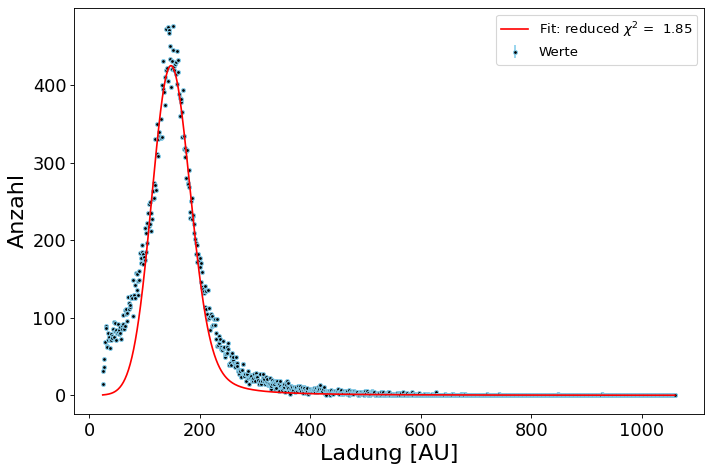

\begin{figure}[ht] 
 	\centering 
 	\includegraphics[width= 0.65 \textwidth]{Fits/A4_V80.h5_charge.txt_Fit.pdf} 
	\caption{A4_V80.h5_charge.txt, Fit} 
 	\label{fig:A4_V80.h5_charge.txt, Fit} 
\end{figure}
1.8468282224929382


name,value,initial value,min,max,vary
mpv,150.087577,None,100.794475,199.380680,True
eta,10.0000000,None,0.10000000,25.0000000,True
sigma,28.7573981,None,0.10000000,199.380680,True
A,476.000000,None,1.00000000,952.000000,True


In [16]:
# Validate mask has data
x_masked = x[mask]
y_masked = y[mask]

if len(x_masked) == 0:
    raise ValueError("Mask results in empty dataset")

def land(x, mpv, eta, sigma, A):
    try:
        return A * pylandau.langau(x, mpv, eta, sigma)
    except Exception as e:
        print(f"Error in Landau function: {e}")
        return np.zeros_like(x)

mod = Model(land)
pars = mod.make_params()

# More robust initial parameter estimation
pars['mpv'].value = np.median(x_masked)
pars['mpv'].min = np.min(x_masked)
pars['mpv'].max = np.max(x_masked)

pars['eta'].value = 10
pars['eta'].min = 0.1
pars['eta'].max = 25.0

pars['sigma'].value = np.std(x_masked)
pars['sigma'].min = 0.1
pars['sigma'].max = np.max(x_masked)

pars['A'].value = np.max(y_masked)
pars['A'].min = 1
pars['A'].max = np.max(y_masked) * 2

# Add bounds and try different fitting method
weights = 1/np.sqrt(Daten.get_y()[mask])
weights[weights == np.inf] = 0
# Daten.set_yerr(weights)

result = mod.fit(y_masked, pars, x=x_masked, method='lbfgs', weights = weights)
result

finish(Daten.get_x(), Daten.get_y(), result, Daten.get_FileName(), 
       Daten.get_yerr(), Daten.get_YName(), Daten.get_XName())
plt.show()
print(result.redchi)
pars